# Retail Strategy and Analytics
WICLIFF TAH ANGWAH
2022-09-05

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [394]:
cutomers = pd.read_csv('QVI_purchase_behaviour.csv')
transactions = pd.read_excel('QVI_transaction_data.xlsx')

# Exploratory Data Analysis

In [395]:
cutomers.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [396]:
cutomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [397]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [398]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [399]:
import datetime
transactions['DATE'] = transactions['DATE'].apply(lambda x: (datetime.date(1899,12,31) + datetime.timedelta(x)))

In [400]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-18,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-18,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-19,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [401]:
transactions[['PROD_NAME']].describe()

,PROD_NAME
count,264836
unique,114
top,Kettle Mozzarella Basil & Pesto 175g
freq,3304


In [402]:
transactions['PROD_NAME'].value_counts().head(5)

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Name: PROD_NAME, dtype: int64

In [403]:
transactions.groupby('PROD_NAME')['TXN_ID'].count()

PROD_NAME
Burger Rings 220g                         1564
CCs Nacho Cheese    175g                  1498
CCs Original 175g                         1514
CCs Tasty Cheese    175g                  1539
Cheetos Chs & Bacon Balls 190g            1479
                                          ... 
WW Sour Cream &OnionStacked Chips 160g    1483
WW Supreme Cheese   Corn Chips 200g       1509
Woolworths Cheese   Rings 190g            1516
Woolworths Medium   Salsa 300g            1430
Woolworths Mild     Salsa 300g            1491
Name: TXN_ID, Length: 114, dtype: int64

In [404]:
transactions['PRODUCT_NAME'] = transactions.loc[:,'PROD_NAME'].str.replace('[^A-Za-z\s]+', "").values
transactions['PRODUCT_NAME'] = transactions['PROD_NAME'].str[:-1]
transactions['PRODUCT_NAME']=transactions['PROD_NAME'].str.strip()
transactions['PRODUCT_NAME'].value_counts()

C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_20704/3914735720.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  transactions['PRODUCT_NAME'] = transactions.loc[:,'PROD_NAME'].str.replace('[^A-Za-z\s]+', "").values


Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PRODUCT_NAME, Length: 114, dtype: int64

# Investigating for chips data only

In [405]:
t = transactions[transactions['PRODUCT_NAME'].str.contains('Salsa', case=False) == False]

In [406]:
t['PRODUCT_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
Sunbites Whlegrn    Crisps Frch/Onin 90g    1432
RRD Pc Sea Salt     165g                    1431
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PRODUCT_NAME, Length: 105, dtype: int64

In [407]:
t.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


# Outlier Detection

In [408]:
t[t['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCT_NAME
69762,2018-08-20,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme 380g
69763,2019-05-21,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme 380g


In [409]:
t[(t['LYLTY_CARD_NBR'] == 226000)&(t['PROD_QTY'] <  200)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCT_NAME


In [410]:
t = t[t['LYLTY_CARD_NBR'] != 226000]

In [411]:
t.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [412]:
t['DATE'].value_counts()

2018-12-25    865
2018-12-24    853
2018-12-23    840
2018-12-20    839
2018-12-21    808
             ... 
2019-06-25    612
2018-10-19    611
2018-11-26    610
2018-09-23    609
2019-06-14    607
Name: DATE, Length: 364, dtype: int64

# Missing Date Analysis

In [413]:
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + datetime.timedelta(n)

In [414]:
start_date=date(2018,7,1)
end_date=date(2019,7,1)

In [415]:
list=[]
for single_date in daterange(start_date, end_date):
    list.append(single_date.strftime("%Y-%m-%d"))

In [416]:
dates=pd.DataFrame(list)
dates.columns=['DATE']

In [417]:
len(list)

365

In [418]:
dates.head()

,DATE
0,2018-07-01
1,2018-07-02
2,2018-07-03
3,2018-07-04
4,2018-07-05


In [419]:
t.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCT_NAME
0,2018-10-18,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSalt175g
1,2019-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese 175g
2,2019-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken 170g
3,2018-08-18,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly S/Cream&Onion 175g
4,2018-08-19,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili 150g


In [420]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            246740 non-null  object 
 1   STORE_NBR       246740 non-null  int64  
 2   LYLTY_CARD_NBR  246740 non-null  int64  
 3   TXN_ID          246740 non-null  int64  
 4   PROD_NBR        246740 non-null  int64  
 5   PROD_NAME       246740 non-null  object 
 6   PROD_QTY        246740 non-null  int64  
 7   TOT_SALES       246740 non-null  float64
 8   PRODUCT_NAME    246740 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 18.8+ MB


In [421]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    365 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [422]:
t['DATE'] = t['DATE'].replace(list)

In [423]:
counts =  pd.DataFrame(t['DATE'].value_counts()).reset_index()

In [424]:
cola=['DATE','COUNT']
counts.columns=cola
counts.head()


,DATE,COUNT
0,2018-12-25,865
1,2018-12-24,853
2,2018-12-23,840
3,2018-12-20,839
4,2018-12-21,808


In [425]:
dates.head()


,DATE
0,2018-07-01
1,2018-07-02
2,2018-07-03
3,2018-07-04
4,2018-07-05


<AxesSubplot:xlabel='DATE'>

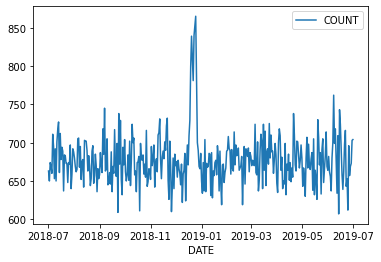

In [426]:
counts.plot(x='DATE', y='COUNT')

In [427]:
dates['DATE']=pd.to_datetime(dates['DATE'])
counts['DATE']=pd.to_datetime(counts['DATE'])

In [428]:
Dates=pd.merge(counts, dates, on='DATE', how='right')

In [429]:
Dates

,DATE,COUNT
0,2018-07-01,NaN
1,2018-07-02,663.0
2,2018-07-03,650.0
3,2018-07-04,674.0
4,2018-07-05,669.0
...,...,...
360,2019-06-26,696.0
361,2019-06-27,657.0
362,2019-06-28,669.0
363,2019-06-29,673.0


<AxesSubplot:xlabel='DATE'>

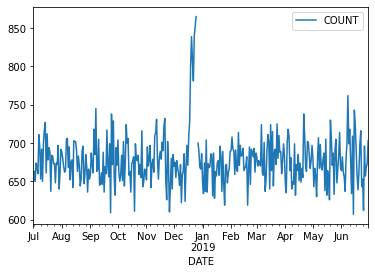

In [430]:
Dates.plot(x='DATE',  y='COUNT')

<AxesSubplot:xlabel='DATE'>

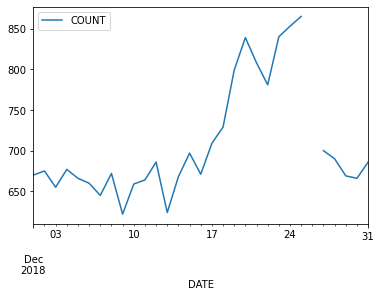

In [431]:
Dates[Dates['DATE'].dt.month == 12].plot(x='DATE', y='COUNT')

# Data Analysis to provide insights
-FEATURE ENGINEERING TO ADD BRAND NAME AND PACK SIZE COLUMNS

In [447]:
c_transactions =  transactions[transactions['PROD_NAME'].str.contains('Salsa', case=False) == False]

In [448]:
c_transactions['PACK_SIZE']=c_transactions['PROD_NAME'].str.replace('[^0-9]+', "")

C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_20704/500153134.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  c_transactions['PACK_SIZE']=c_transactions['PROD_NAME'].str.replace('[^0-9]+', "")
C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_20704/500153134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_transactions['PACK_SIZE']=c_transactions['PROD_NAME'].str.replace('[^0-9]+', "")


In [449]:
c_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCT_NAME,PACK_SIZE
0,2018-10-18,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSalt175g,175
1,2019-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese 175g,175
2,2019-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken 170g,170
3,2018-08-18,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly S/Cream&Onion 175g,175
4,2018-08-19,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150


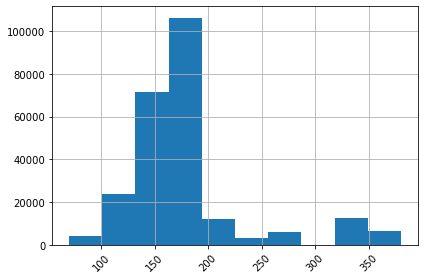

In [450]:
c_transactions['PACK_SIZE'].astype(int).sort_values(ascending=True).hist(bins=10)
plt.xticks(rotation=45)
plt.tight_layout()

In [451]:
c_transactions['PACK_SIZE'].value_counts()

175    66390
150    40203
134    25102
110    22387
170    19983
165    15297
330    12540
380     6418
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: PACK_SIZE, dtype: int64

In [455]:
c_transactions['BRAND_NAME'] = transactions['PROD_NAME'].str.split()
c_transactions['BRAND_NAME'] = c_transactions['BRAND_NAME'].str[0]

C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_20704/1874118429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_transactions['BRAND_NAME'] = transactions['PROD_NAME'].str.split()
C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_20704/1874118429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_transactions['BRAND_NAME'] = c_transactions['BRAND_NAME'].str[0]


In [456]:
c_transactions['BRAND_NAME'].value_counts()

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND_NAME, dtype: int64

In [463]:
c_transactions['BRAND_NAME']=c_transactions['BRAND_NAME'].str.replace('RED','RRD')
c_transactions['BRAND_NAME']=c_transactions['BRAND_NAME'].str.replace('Snbts','Sunbites')
c_transactions['BRAND_NAME']=c_transactions['BRAND_NAME'].str.replace('Dorito','Doritos')

C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_20704/4146631149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_transactions['BRAND_NAME']=c_transactions['BRAND_NAME'].str.replace('RED','RRD')
C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_20704/4146631149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_transactions['BRAND_NAME']=c_transactions['BRAND_NAME'].str.replace('Snbts','Sunbites')
C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_20704/4146631149.py:3: SettingWithCopyWarning: 
A value is t

In [465]:
cutomers.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# MERGING THE CUSTOMERS AND TRANSACTIONS DATA

In [467]:
df = pd.merge(c_transactions, cutomers, on='LYLTY_CARD_NBR', how='left')

In [468]:
df.shape

(246742, 13)

In [469]:
df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PRODUCT_NAME        0
PACK_SIZE           0
BRAND_NAME          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [470]:
df.to_csv('cleaned_data.csv')

In [471]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCT_NAME,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-18,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSalt175g,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese 175g,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken 170g,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-18,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly S/Cream&Onion 175g,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-19,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


# CUSTOMER SEGMENTATION ANALYSIS

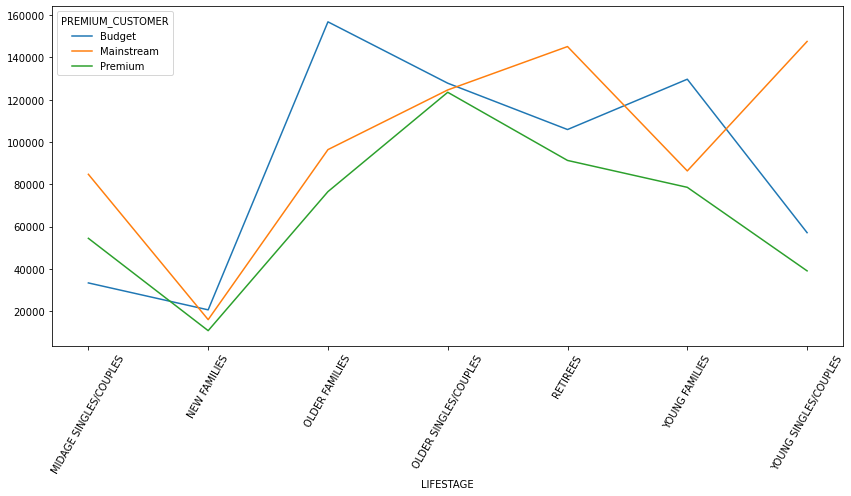

In [481]:
df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack('PREMIUM_CUSTOMER').plot(figsize=(12,7))
plt.xticks(rotation=60)
plt.tight_layout()

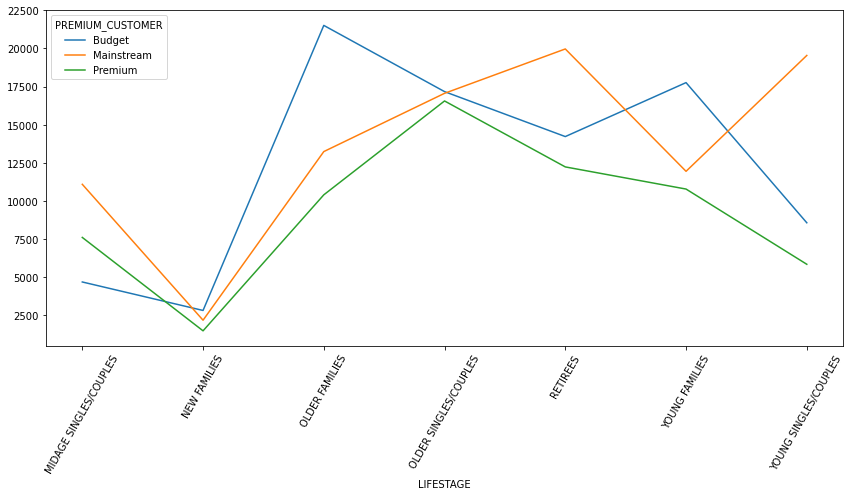

In [482]:
df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count().unstack('PREMIUM_CUSTOMER').plot(figsize=(12,7))
plt.xticks(rotation=60)
plt.tight_layout()

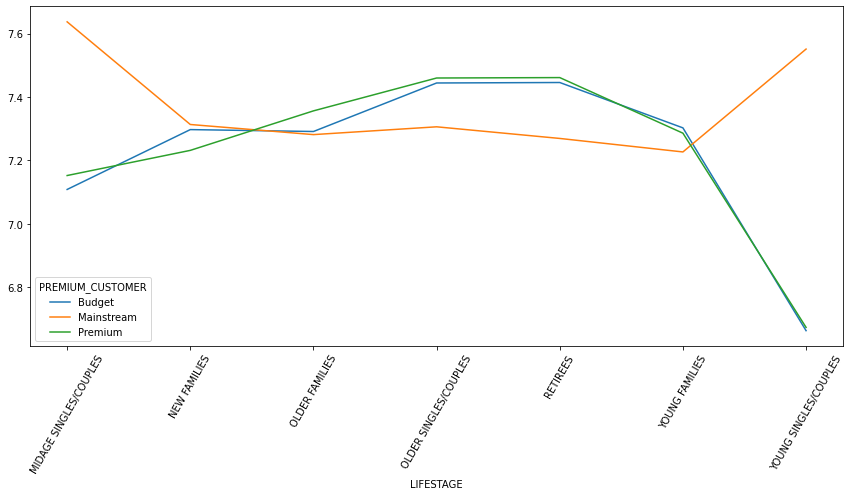

In [483]:
df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().unstack('PREMIUM_CUSTOMER').plot(figsize=(12,7))
plt.xticks(rotation=60)
plt.tight_layout()

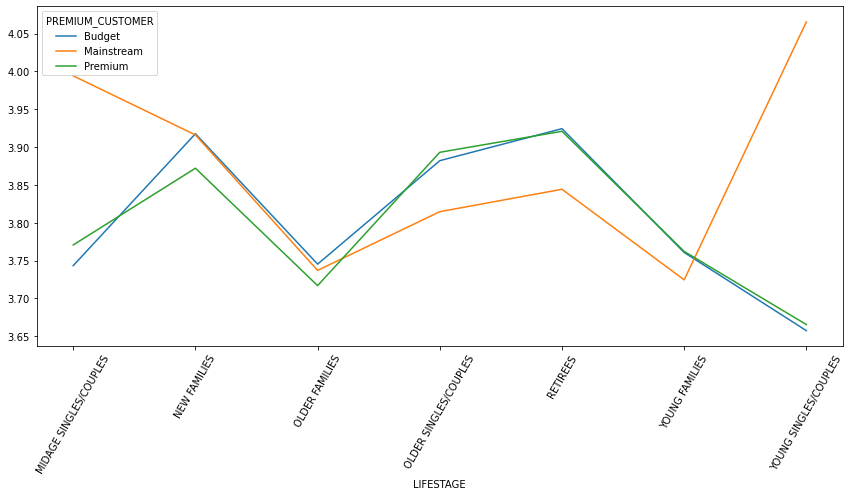

In [485]:
df['unit_price']= df['TOT_SALES']/df['PROD_QTY']
df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['unit_price'].mean().unstack('PREMIUM_CUSTOMER').plot(figsize=(12,7))
plt.xticks(rotation=60)
plt.tight_layout()

# T-Test For Independence
H0: The average unit prices for mainstream vs budget and premium for midage and young singles and adults is the same

HA: There is a significant difference between the average unit prices for mainstream vs budget and premium for midage and young singles and adults

In [488]:
test_df = df[(df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | (df['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]
mainstream = test_df[test_df['PREMIUM_CUSTOMER'] == 'Mainstream']
Non_mainstream = test_df[test_df['PREMIUM_CUSTOMER'] != 'Mainstream']

In [496]:
from scipy.stats import ttest_ind
test_results = ttest_ind(mainstream['unit_price'], Non_mainstream['unit_price'])

In [497]:
test_results

Ttest_indResult(statistic=37.83196107667815, pvalue=2.235645611549355e-309)

# Insight
The p_value is very small so we reject the null hypothesis that There is no significant difference between the average unit prices for mainstream vs budget and premium for midage and young singles and adults

In [498]:
affinity_df = df[(df['PREMIUM_CUSTOMER']=='Mainstream') | (df['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]
affinity_df['BRAND_NAME'].value_counts()

Kettle        18472
Smiths        12011
Pringles      11272
Doritoss       9963
Thins          6229
RRD            5144
Infuzions      4891
Cobs           4421
WW             4418
Twisties       4280
Tostitos       4215
Tyrrells       2919
Grain          2853
Natural        2610
Cheezels       2003
CCs            2003
Red            1913
Infzns         1422
Doritos        1422
Cheetos        1309
Sunbites       1275
Smith          1262
Woolworths      680
Burger          664
French          623
GrnWves         614
NCC             580
Name: BRAND_NAME, dtype: int64

# APRIORI ALGORITHM FOR FREQUENCY OF BRAND NAMES AND PACK SIZES

In [500]:
!pip install mlxtend

from mlxtend.frequent_patterns import apriori, association_rules

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [501]:
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PRODUCT_NAME', 'PACK_SIZE',
       'BRAND_NAME', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'unit_price'],
      dtype='object')

In [503]:
basket_mainstream = (df[df['PREMIUM_CUSTOMER'] =="Mainstream"]
          .groupby(['TXN_ID', 'BRAND_NAME'])['PROD_QTY']
          .sum().unstack().reset_index().fillna(0)
          .set_index('TXN_ID'))

In [504]:
basket_young = (df[df['LIFESTAGE'] =="YOUNG SINGLES/COUPLES"]
          .groupby(['TXN_ID', 'BRAND_NAME'])['PROD_QTY']
          .sum().unstack().reset_index().fillna(0)
          .set_index('TXN_ID'))

In [505]:
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1
basket_mainstream = basket_mainstream.applymap(hot_encode)
basket_young = basket_young.applymap(hot_encode)

In [506]:
# Building the model
frq_items = apriori(basket_mainstream, min_support = 0.05, use_colnames = True)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []


C:\Users\Boss Man\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [509]:
frq_items.sort_values('support', ascending=False)

,support,itemsets
1,0.173617,(Kettle)
3,0.108322,(Smiths)
2,0.104756,(Pringles)
0,0.093712,(Doritoss)
4,0.057488,(Thins)


In [510]:
frq_items_young = apriori(basket_young, min_support=0.05, use_colnames = True)
frq_items_young.sort_values('support', ascending=False)

C:\Users\Boss Man\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
1,0.174025,(Kettle)
2,0.108791,(Pringles)
3,0.104952,(Smiths)
0,0.093819,(Doritoss)
4,0.057851,(Thins)


# INSIGHT

The top brands being bought by our recommended segments are kettle, pringles, smiths, doritos, and thins. Hence an increase in the supply of these brands will increase sales given that buyers are willing to pay higer unit prices for them

In [511]:
basket_mainstream_pack = (df[df['PREMIUM_CUSTOMER'] =="Mainstream"]
          .groupby(['TXN_ID', 'PACK_SIZE'])['PROD_QTY']
          .sum().unstack().reset_index().fillna(0)
          .set_index('TXN_ID'))
basket_young_pack = (df[df['LIFESTAGE'] =="YOUNG SINGLES/COUPLES"]
          .groupby(['TXN_ID', 'PACK_SIZE'])['PROD_QTY']
          .sum().unstack().reset_index().fillna(0)
          .set_index('TXN_ID'))
basket_mainstream_pack = basket_mainstream_pack.applymap(hot_encode)
basket_young_pack = basket_young_pack.applymap(hot_encode)

In [514]:
frq_items_mainstream_pack = apriori(basket_mainstream_pack, min_support=0.05, use_colnames = True)
frq_items_mainstream_pack.sort_values('support', ascending=False)

C:\Users\Boss Man\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
5,0.265594,(175)
2,0.163747,(150)
1,0.104756,(134)
0,0.094283,(110)
4,0.082297,(170)
3,0.061878,(165)
6,0.052473,(330)


In [515]:
frq_items_young_pack = apriori(basket_young_pack, min_support=0.05, use_colnames = True)
frq_items_young_pack.sort_values('support', ascending=False)

C:\Users\Boss Man\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
5,0.264182,(175)
2,0.159496,(150)
1,0.108791,(134)
0,0.095237,(110)
4,0.081180,(170)
3,0.061335,(165)
6,0.053244,(330)


# INSIGHTS

There should be an increase in the supply of packets with sizes 175, 150, 134, 110 and 170 as these are the top 5 most bought pack sizes by our young singles and couples as well as our mainstream premium users.

In [516]:
!pip  install pandoc

  Created wheel for pandoc: filename=pandoc-2.2-py3-none-any.whl size=29561 sha256=150e8a229ff1a0c91801796ab8f822710cf276fcd84114bf5db74b3fe845bbae
  Stored in directory: c:\users\boss man\appdata\local\pip\cache\wheels\2d\da\b1\54ff0401ef9b07b60c7fc9cffe616f243cf27dc3d04bd5d5ef
Successfully built pandoc
